In [2]:
import os

path, dirs, files = next(os.walk('train'))
file_count = len(files)
print(file_count)


25000


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split




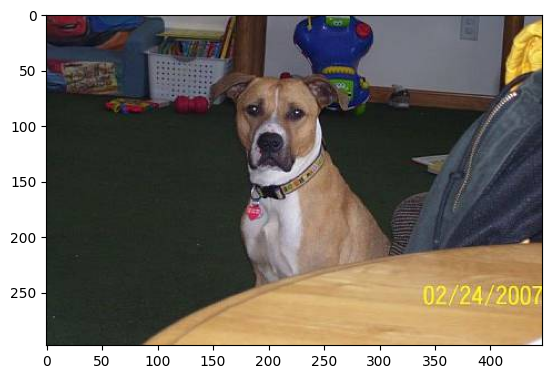

In [5]:
#random image display

img = mpimg.imread('train/dog.4530.jpg')
imgplt = plt.imshow(img)
plt.show()

In [6]:
#now we need to resize images to make everything uniform

os.mkdir('image_resized')


In [32]:
original_folder = 'train/'
resized_folder = 'image_resized/'

for i in range(25000):

    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename 

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder+filename 
    img.save(newImgPath)

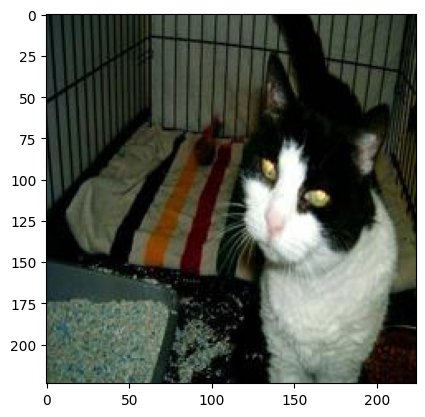

In [20]:
img=mpimg.imread('image_resized/cat.12444.jpg')
imgplt = plt.imshow(img)
plt.show()

In [30]:
'''
now for label we will assign 

0--> Cat
1--> Dog

'''

'\nnow for label we will assign \n\n0--> Cat\n1--> Dog\n\n'

In [34]:
filennames = os.listdir('image_resized/')

labels =[]

for i in range(25000):
    file_name = filennames[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [35]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[12500 12500]


In [36]:
import cv2
import glob


In [37]:
image_direc = 'image_resized/'
image_extensions = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_direc + '*.' + e)) for e in image_extensions]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [38]:
X = dog_cat_images
Y = np.asarray(labels)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
#now we need to scale the data according to our usgae

X_train_scaled = X_train/255

X_test_scales = X_test/255

In [41]:
import tensorflow as tf
import tensorflow_hub as hub


In [42]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'


pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable=False)
 

In [43]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [46]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
625/625 [==============================] - 308s 481ms/step - loss: 0.0636 - acc: 0.9780
Epoch 2/5
625/625 [==============================] - 308s 493ms/step - loss: 0.0463 - acc: 0.9843
Epoch 3/5
625/625 [==============================] - 307s 490ms/step - loss: 0.0417 - acc: 0.9852
Epoch 4/5
625/625 [==============================] - 300s 480ms/step - loss: 0.0375 - acc: 0.9866
Epoch 5/5
625/625 [==============================] - 294s 470ms/step - loss: 0.0346 - acc: 0.9880
